<h1>Healpy tutorial</h1>

<a href="https://healpy.readthedocs.io/en/latest/tutorial.html">Healpy tutorial</a> <br>
<a href="https://healpix.jpl.nasa.gov">Healpix (jpl)</a><br>
<a href="https://astropy-healpix.readthedocs.io/en/latest/index.html">Healpix dokumentacija</a><br>
<a href="https://healpix.sourceforge.io">Healpy tutorial</a><br>


<h2>Healpy raspored ...</h2>
<img src="img/moll_nside32_ring.png" width="600" />
<img src="img/moll_nside32_nest.png" width="600" />
<img src="img/gorski_f1.jpg" width="600" />


In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdul = fits.open('podaci/wmap_band_imap_r9_5yr_K_v3.fits')

hdul.info()

#print (repr(hdul[1].header))
#print (hdul[1].data.dtype.names)
#print (hdul[1].data['temperature'])
#print (hdul[1].data['N_OBS'])


Filename: podaci/wmap_band_imap_r9_5yr_K_v3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      19   ()      
  1  Archive Map Table    1 BinTableHDU     20   3145728R x 2C   [E, E]   


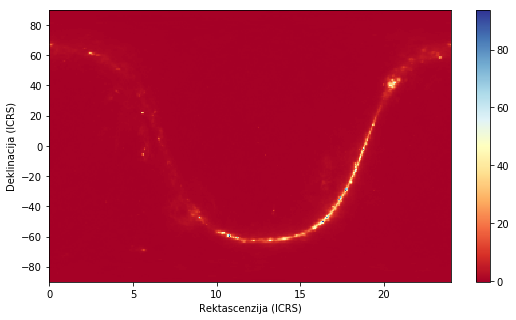

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic, SkyCoord
from astropy import units as u


hdulist = fits.open('podaci/wmap_band_imap_r9_5yr_K_v3.fits')

nside = hdulist[1].header['NSIDE']
order = hdulist[1].header['ORDERING']

hp = HEALPix(nside=nside, order=order, frame=Galactic())

# Koordinate galaktickog centra
# RA = 17h 45.6m, Dec = -28⁰ 56’ (2000.0). 

ra = np.linspace(0., 360., 300) * u.deg
dec = np.linspace(90., -90., 200) * u.deg

ra_grid, dec_grid = np.meshgrid(ra, dec)
# The International Celestial Reference System (ICRS)
coords = SkyCoord(ra_grid.ravel(), dec_grid.ravel(), frame='icrs')

temperature = hdulist[1].data['temperature']
tmap = hp.interpolate_bilinear_skycoord(coords, temperature)
tmap = tmap.reshape((200, 300))


plt.figure(figsize=(9, 5))
#extent=[-1, 1, -10, 10]
plt.imshow(tmap, extent=[0, 24, -90, 90], cmap=plt.cm.RdYlBu, aspect='auto')
plt.colorbar()
plt.xlabel('Rektascenzija (ICRS)')
plt.ylabel('Deklinacija (ICRS)')
plt.show()





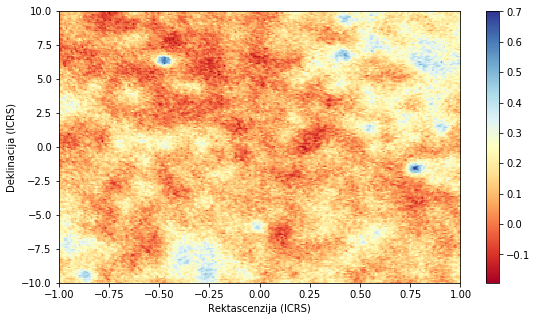

In [8]:
from astropy.io import fits
from astropy_healpix import HEALPix
from astropy.coordinates import Galactic, SkyCoord
from astropy import units as u

hdulist = fits.open('podaci/wmap_band_imap_r9_5yr_K_v3.fits')


nside = hdulist[1].header['NSIDE']
order = hdulist[1].header['ORDERING']
hp = HEALPix(nside=nside, order=order, frame=Galactic())

ra = np.linspace(-5., 20., 300) * u.deg
dec = np.linspace(-10., 10., 200) * u.deg
ra_grid, dec_grid = np.meshgrid(ra, dec)

coords = SkyCoord(ra_grid.ravel(), dec_grid.ravel(), frame='icrs')

temperature = hdulist[1].data['temperature']
tmap = hp.interpolate_bilinear_skycoord(coords, temperature)
tmap = tmap.reshape((200, 300))

plt.figure(figsize=(9, 5))
im = plt.imshow(tmap, extent=[-1, 1, -10, 10], cmap=plt.cm.RdYlBu, aspect='auto')
plt.colorbar(im)
plt.xlabel('Rektascenzija (ICRS)')
plt.ylabel('Deklinacija (ICRS)')
plt.show()